# Customer Segmentation Analysis

This notebook focuses on analyzing **product returns** within the retail supply chain dataset. Returns are a critical metric because they directly affect revenue, customer satisfaction, and operational efficiency.

**Goals**
- Quantify return rates by calculating overall percentages and comparing across product categories, regions, and customer segments  
- Identify temporal trends by tracking return frequency over time to detect seasonality or spikes related to promotions or product launches  
- Assess financial impact by measuring revenue lost due to returns and comparing the monetary value of returned items against total sales  
- Profile return drivers by exploring correlations with product attributes and customer behavior patterns, such as new versus repeat customers  
- Generate actionable insights by highlighting categories or regions with high return rates and suggesting strategies to reduce returns through quality checks, clearer product descriptions, and improved logistics

**Expected Outcome:**  
A validated returns analysis that quantifies the scale and impact of product returns, highlights key categories and regions with elevated return rates, and provides actionable recommendations to reduce returns, improve customer satisfaction, and optimize supply chain efficiency.

In [1]:
# Import some libraries

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load dataset

sales = pd.read_csv("../data/cleaned/sales_clean.csv")
sales["Order Date"] = pd.to_datetime(sales["Order Date"])
sales['Returned'] = sales['Returned'].astype(str)
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164


In [4]:
# Calculate total orders and returns
total_orders = len(sales)
total_returns = sales[sales['Returned'] == "Yes"].shape[0]

return_rate = total_returns / total_orders
print(f"Overall return rate: {return_rate:.2%}")

Overall return rate: 8.00%


In [7]:
# Return rate by category, region, segment
return_rate_by_category = sales.groupby("Category")["Returned"].apply(lambda x: (x=="Yes").mean())
print("Return rate by category:")
print((return_rate_by_category * 100).round(2).astype(str) + "%")

return_rate_by_region = sales.groupby("Region")["Returned"].apply(lambda x: (x=="Yes").mean())
print("\nReturn rate by region:")
print((return_rate_by_region * 100).round(2).astype(str) + "%")

return_rate_by_segment = sales.groupby("Segment")["Returned"].apply(lambda x: (x=="Yes").mean())
print("\nReturn rate by segment:")
print((return_rate_by_segment * 100).round(2).astype(str) + "%")

Return rate by category:
Category
Furniture          8.06%
Office Supplies    7.85%
Technology         8.45%
Name: Returned, dtype: object

Return rate by region:
Region
Central    3.96%
East       5.23%
South      4.26%
West       15.3%
Name: Returned, dtype: object

Return rate by segment:
Segment
Consumer       8.21%
Corporate      8.51%
Home Office    6.56%
Name: Returned, dtype: object


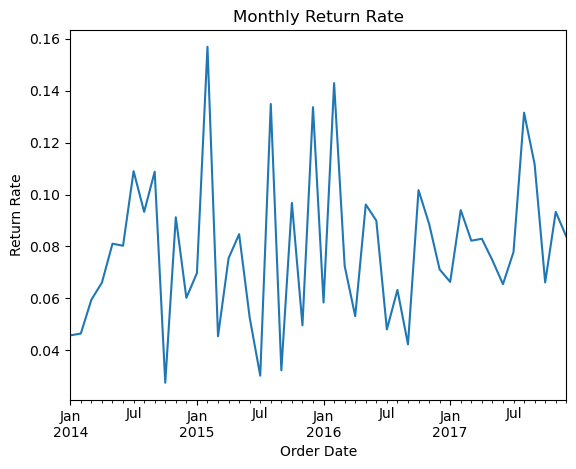

In [9]:
# Return rate per month
monthly_returns = sales.groupby(sales['Order Date'].dt.to_period("M"))['Returned'].apply(lambda x: (x=="Yes").mean())

monthly_returns.plot(kind="line", title="Monthly Return Rate")
plt.ylabel("Return Rate")
plt.show()

In [10]:
# Say there is a ‘Sales’ for transaction values
total_sales = sales['Sales'].sum()
returned_sales = sales.loc[sales['Returned']=="Yes", 'Sales'].sum()

print(f"Revenue lost due to returns: {returned_sales:.2f}")
print(f"Percentage of revenue lost: {returned_sales/total_sales:.2%}")

Revenue lost due to returns: 180504.28
Percentage of revenue lost: 7.86%


In [12]:
# Return rate by price range
sales['Price Range'] = pd.cut(
    sales['Sales'],
    bins=[0,50,200,500,1000,5000],
    labels=["Low","Medium","High","Premium","Luxury"]
)
return_rate_by_price = sales.groupby("Price Range", observed=True)['Returned'].apply(lambda x: (x=="Yes").mean())

formatted_price = return_rate_by_price.apply(lambda v: f"{v:.2%}")
print("Return rate by price range:")
print(formatted_price)

Return rate by price range:
Price Range
Low        7.77%
Medium     8.15%
High       8.54%
Premium    8.36%
Luxury     7.57%
Name: Returned, dtype: object


In [13]:
# Highlight the category with the highest return rate
top_return_categories = return_rate_by_category.sort_values(ascending=False).head(5)
print("Top categories with highest return rates:")
print(top_return_categories)

# Highlight the region with the highest return rate
top_return_regions = return_rate_by_region.sort_values(ascending=False).head(5)
print("Top regions with highest return rates:")
print(top_return_regions)

Top categories with highest return rates:
Category
Technology         0.084461
Furniture          0.080622
Office Supplies    0.078493
Name: Returned, dtype: float64
Top regions with highest return rates:
Region
West       0.152982
East       0.052317
South      0.042593
Central    0.039604
Name: Returned, dtype: float64


# Closing & Strategic Insights
This returns analysis confirms several critical patterns that require tailored strategies to minimize losses and improve customer satisfaction:
- **Category focus** – Technology products show the highest return rate (~8.45%), requiring stricter quality checks and clearer product specifications 
- **Regional disparity** – The West region has a significantly higher return rate (~15.9%), suggesting localized issues in logistics, product fit, or customer expectations  
- **Customer segments** – Consumer segment records the highest return rate (~8.21%), indicating the need for better communication and post‑purchase support  
- **Price sensitivity** – Mid‑range and premium products (8.15–8.54%) are more prone to returns, highlighting the importance of accurate descriptions and expectation management
- **Financial impact** – Returns account for ~7.86% of revenue loss, underscoring the urgency of targeted interventions

---

**Key Takeaway**\
Return rates are concentrated in specific categories, regions, and price ranges, with the West region and Technology products standing out as high‑risk areas. Addressing these issues through quality improvements, better product information, and targeted logistics strategies can significantly reduce losses and enhance customer satisfaction.

**Practical Implication with PDCA Cycle**
- **Plan** – Define objectives to reduce return rates in high‑risk categories, regions, and price ranges. Establish KPIs such as return percentage, revenue loss, and customer satisfaction scores.  
- **Do** – Implement corrective actions: enhance product quality checks, improve product descriptions, strengthen logistics in the West region, and launch customer education campaigns.  
- **Check** – Monitor monthly return trends, revenue impact, and category/region breakdowns. Compare KPIs against baseline to evaluate effectiveness of interventions.  
- **Act** – Standardize successful practices (e.g., improved descriptions, logistics upgrades), refine weaker strategies, and embed insights into future supply chain planning to ensure continuous improvement and sustainable growth.